In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv("Temps.csv", parse_dates=["dt"]) #parse_dates ile birlikte tarih içeren verilerin türünü düzenledik.
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [9]:
data.dtypes

dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
City                                     object
Country                                  object
Latitude                                 object
Longitude                                object
dtype: object

In [10]:
data.info

<bound method DataFrame.info of                 dt  AverageTemperature  AverageTemperatureUncertainty    City  \
0       1743-11-01               6.068                          1.737   Århus   
1       1743-12-01                 NaN                            NaN   Århus   
2       1744-01-01                 NaN                            NaN   Århus   
3       1744-02-01                 NaN                            NaN   Århus   
4       1744-03-01                 NaN                            NaN   Århus   
...            ...                 ...                            ...     ...   
8599207 2013-05-01              11.464                          0.236  Zwolle   
8599208 2013-06-01              15.043                          0.261  Zwolle   
8599209 2013-07-01              18.775                          0.193  Zwolle   
8599210 2013-08-01              18.025                          0.298  Zwolle   
8599211 2013-09-01                 NaN                            NaN  Zwolle

In [11]:
data.describe

<bound method NDFrame.describe of                 dt  AverageTemperature  AverageTemperatureUncertainty    City  \
0       1743-11-01               6.068                          1.737   Århus   
1       1743-12-01                 NaN                            NaN   Århus   
2       1744-01-01                 NaN                            NaN   Århus   
3       1744-02-01                 NaN                            NaN   Århus   
4       1744-03-01                 NaN                            NaN   Århus   
...            ...                 ...                            ...     ...   
8599207 2013-05-01              11.464                          0.236  Zwolle   
8599208 2013-06-01              15.043                          0.261  Zwolle   
8599209 2013-07-01              18.775                          0.193  Zwolle   
8599210 2013-08-01              18.025                          0.298  Zwolle   
8599211 2013-09-01                 NaN                            NaN  Zwol

In [12]:
data.shape

(8599212, 7)

In [13]:
data.isna().sum() #kayıp veri sayısına ulaştık.

dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64

In [14]:
data.isna().sum() / data.shape[0] * 100 #veri setimizdeki kayıp verinin, tüm veriye göre yüzdelik oranına baktık.

dt                               0.000000
AverageTemperature               4.234458
AverageTemperatureUncertainty    4.234458
City                             0.000000
Country                          0.000000
Latitude                         0.000000
Longitude                        0.000000
dtype: float64

In [15]:
data_prepared = data.dropna(axis=0, how="any") #veri setimizdeki kayıp verileri silip temiz verileri 'data_prepared' değişkenine aldık.

In [16]:
data_prepared.shape

(8235082, 7)

In [17]:
data_prepared.isna().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

In [18]:
data_prepared.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E


In [19]:
data_prepared[["City","Country"]]

,City,Country
0,Århus,Denmark
5,Århus,Denmark
6,Århus,Denmark
7,Århus,Denmark
8,Århus,Denmark
...,...,...
8599206,Zwolle,Netherlands
8599207,Zwolle,Netherlands
8599208,Zwolle,Netherlands
8599209,Zwolle,Netherlands


In [20]:
data_prepared["Country"].value_counts() #ülkelere göre veri sayısını bulduk.

India               960548
China               819132
United States       661524
Brazil              451645
Russia              448663
                     ...  
Burundi               1675
Eritrea               1669
Djibouti              1658
Oman                  1652
Papua New Guinea      1580
Name: Country, Length: 159, dtype: int64

In [21]:
data_prepared["Country"].value_counts().shape #kaç adet ülke olduğunu görmek için 'shape' kullandık.

(159,)

In [22]:
data_prepared["Country"] == "Turkey" #tüm veri setinin içerisinde 'Turkey' alanını aradık.

0          False
5          False
6          False
7          False
8          False
           ...  
8599206    False
8599207    False
8599208    False
8599209    False
8599210    False
Name: Country, Length: 8235082, dtype: bool

In [23]:
data_prepared[data_prepared["Country"] == "Turkey"] #Country değeri yalnızca 'Turkey' olan verileri getirdik.

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
3239,1743-11-01,10.013,2.291,Çorlu,Turkey,40.99N,27.69E
3244,1744-04-01,13.685,2.162,Çorlu,Turkey,40.99N,27.69E
3245,1744-05-01,15.021,1.824,Çorlu,Turkey,40.99N,27.69E
3246,1744-06-01,19.663,1.701,Çorlu,Turkey,40.99N,27.69E
3247,1744-07-01,22.314,1.648,Çorlu,Turkey,40.99N,27.69E
...,...,...,...,...,...,...,...
8585429,2013-04-01,11.876,0.293,Zonguldak,Turkey,40.99N,31.95E
8585430,2013-05-01,17.662,0.196,Zonguldak,Turkey,40.99N,31.95E
8585431,2013-06-01,19.818,0.344,Zonguldak,Turkey,40.99N,31.95E
8585432,2013-07-01,21.343,0.288,Zonguldak,Turkey,40.99N,31.95E


In [24]:
data_prepared[(data_prepared["Country"] == "Turkey") | (data_prepared["Country"] == "China")] #Turkey veya China olan verileri getirdik.

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
3239,1743-11-01,10.013,2.291,Çorlu,Turkey,40.99N,27.69E
3244,1744-04-01,13.685,2.162,Çorlu,Turkey,40.99N,27.69E
3245,1744-05-01,15.021,1.824,Çorlu,Turkey,40.99N,27.69E
3246,1744-06-01,19.663,1.701,Çorlu,Turkey,40.99N,27.69E
3247,1744-07-01,22.314,1.648,Çorlu,Turkey,40.99N,27.69E
...,...,...,...,...,...,...,...
8589599,2013-04-01,15.627,1.581,Zunyi,China,28.13N,106.36E
8589600,2013-05-01,19.473,0.227,Zunyi,China,28.13N,106.36E
8589601,2013-06-01,23.670,0.575,Zunyi,China,28.13N,106.36E
8589602,2013-07-01,26.159,0.713,Zunyi,China,28.13N,106.36E


In [25]:
data_prepared[(data_prepared["Country"] == "Turkey") & (data_prepared["AverageTemperature"] > 20)] #'AverageTemperature' değeri 20den büyük olan Türkiye verilerini getirdik.

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
3247,1744-07-01,22.314,1.648,Çorlu,Turkey,40.99N,27.69E
3318,1750-06-01,20.183,1.685,Çorlu,Turkey,40.99N,27.69E
3319,1750-07-01,24.420,1.603,Çorlu,Turkey,40.99N,27.69E
3320,1750-08-01,23.217,1.692,Çorlu,Turkey,40.99N,27.69E
3330,1751-06-01,21.248,1.740,Çorlu,Turkey,40.99N,27.69E
...,...,...,...,...,...,...,...
8585419,2012-06-01,20.797,0.353,Zonguldak,Turkey,40.99N,31.95E
8585420,2012-07-01,23.516,0.298,Zonguldak,Turkey,40.99N,31.95E
8585421,2012-08-01,21.869,0.767,Zonguldak,Turkey,40.99N,31.95E
8585432,2013-07-01,21.343,0.288,Zonguldak,Turkey,40.99N,31.95E


In [26]:
data_prepared[data_prepared["Country"].isin(["Turkey","France","Germany"])] #üç ülkeyi aynı anda sorguladık.

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
3239,1743-11-01,10.013,2.291,Çorlu,Turkey,40.99N,27.69E
3244,1744-04-01,13.685,2.162,Çorlu,Turkey,40.99N,27.69E
3245,1744-05-01,15.021,1.824,Çorlu,Turkey,40.99N,27.69E
3246,1744-06-01,19.663,1.701,Çorlu,Turkey,40.99N,27.69E
3247,1744-07-01,22.314,1.648,Çorlu,Turkey,40.99N,27.69E
...,...,...,...,...,...,...,...
8585429,2013-04-01,11.876,0.293,Zonguldak,Turkey,40.99N,31.95E
8585430,2013-05-01,17.662,0.196,Zonguldak,Turkey,40.99N,31.95E
8585431,2013-06-01,19.818,0.344,Zonguldak,Turkey,40.99N,31.95E
8585432,2013-07-01,21.343,0.288,Zonguldak,Turkey,40.99N,31.95E


In [27]:
data_prepared[data_prepared["Country"].isin(["Turkey","France","Germany"])]["Country"].value_counts() #her ülkede kaç veri olduğuna baktık.

Germany    256446
Turkey     147086
France     113976
Name: Country, dtype: int64

In [28]:
selected_data = data_prepared[data_prepared["Country"].isin(["Turkey","France","Germany"])]

In [29]:
selected_data["Country"].value_counts()

Germany    256446
Turkey     147086
France     113976
Name: Country, dtype: int64

In [30]:
selected_data.groupby(by="Country").mean() #ülkelerin değer ortalamalarını grupladık.

,AverageTemperature,AverageTemperatureUncertainty
Country,,
France,10.337918,1.577883
Germany,8.482791,1.614704
Turkey,12.951888,1.275864


In [31]:
selected_data.groupby(by="Country").max()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Latitude,Longitude
Country,,,,,,
France,2013-08-01,27.174,13.738,Villeurbanne,50.63N,8.29E
Germany,2013-08-01,23.795,14.828,Würzburg,53.84N,9.80E
Turkey,2013-08-01,32.885,9.237,Çorum,42.59N,42.71E


In [32]:
selected_data.groupby(by="Country").agg(["min","max","mean"]) #grupladığımız ülkelerin görmek istediğimiz değerleri listeledik.

dt                                           \
               min        max                          mean   
Country                                                       
France  1743-11-01 2013-08-01 1881-09-04 21:48:33.202779648   
Germany 1743-11-01 2013-08-01 1881-09-04 21:48:33.202779648   
Turkey  1743-11-01 2013-08-01 1892-07-23 07:58:26.209972224   

        AverageTemperature                    AverageTemperatureUncertainty  \
                       min     max       mean                           min   
Country                                                                       
France              -9.497  27.174  10.337918                         0.058   
Germany            -12.008  23.795   8.482791                         0.055   
Turkey             -15.353  32.885  12.951888                         0.056   

                           
            max      mean  
Country                    
France   13.738  1.577883  
Germany  14.828  1.614704  
Turkey    9.237  1.275864

In [33]:
selected_data[selected_data["Country"]=="Turkey"]["AverageTemperature"]

3239       10.013
3244       13.685
3245       15.021
3246       19.663
3247       22.314
            ...  
8585429    11.876
8585430    17.662
8585431    19.818
8585432    21.343
8585433    22.225
Name: AverageTemperature, Length: 147086, dtype: float64

In [34]:
tr_avg_temps = selected_data[selected_data["Country"]=="Turkey"]["AverageTemperature"]
ger_avg_temps = selected_data[selected_data["Country"]=="Germany"]["AverageTemperature"]
fr_avg_temps = selected_data[selected_data["Country"]=="France"]["AverageTemperature"]

C:\Users\Python\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Python\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Python\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use e

<AxesSubplot:xlabel='AverageTemperature', ylabel='Density'>

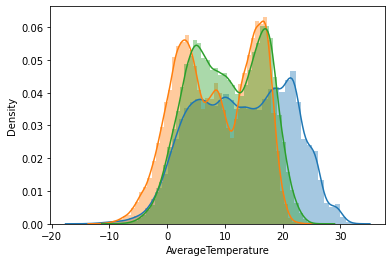

In [35]:
sns.distplot(tr_avg_temps) #Türkiye'nin ortalama sıcaklık dağılım tablosunu çıkardık.
sns.distplot(ger_avg_temps)
sns.distplot(fr_avg_temps)
#3 ülkenin değerlerini tek tabloda karşılaştırdık.

C:\Users\Python\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Python\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Python\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use e

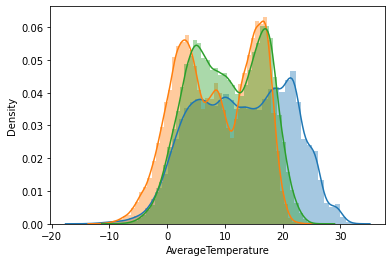

In [36]:
ulkeler = selected_data["Country"].unique()
for ulke in ulkeler:
    sns.distplot(selected_data[selected_data["Country"]==ulke]["AverageTemperature"])
    
#tek tek her ülke için sorgu yazmamak için for döngüsü ile tek sorguda istediğimiz ülkelerin verilerini görselleştirdik.

C:\Users\Python\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Python\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Python\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use e

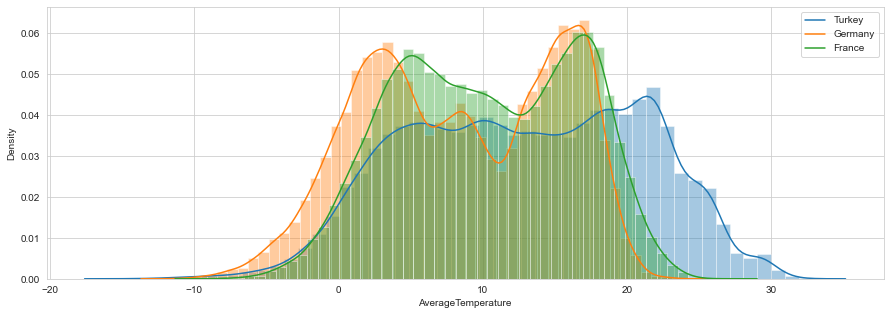

In [37]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 5))
ulkeler = selected_data["Country"].unique()
for ulke in ulkeler:
    sns.distplot(selected_data[selected_data["Country"]==ulke]["AverageTemperature"])

plt.legend(ulkeler)

C:\Users\Python\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Python\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Python\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use e

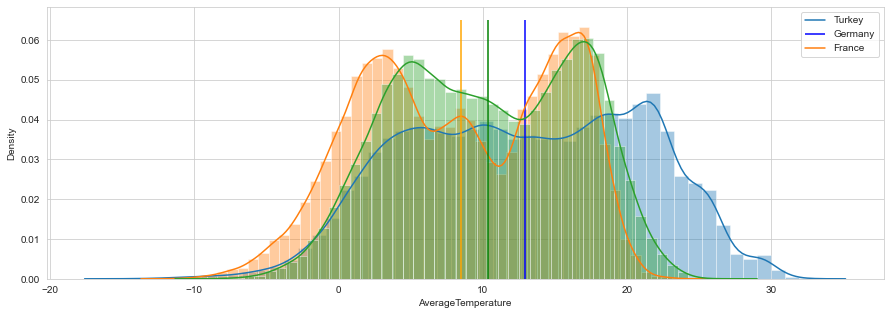

In [38]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 5))
colors = ["blue","orange","green"]

ulkeler = selected_data["Country"].unique()
for color,ulke in zip(colors,ulkeler):
    sns.distplot(selected_data[selected_data["Country"]==ulke]["AverageTemperature"])
    ulke_ort = selected_data[selected_data["Country"]==ulke]["AverageTemperature"].mean()
    plt.vlines(ulke_ort, 0, 0.065, colors=color)

plt.legend(ulkeler)

### Tam Otomatikleştirme

In [39]:
selected_data.columns[1:3]

Index(['AverageTemperature', 'AverageTemperatureUncertainty'], dtype='object')

C:\Users\Python\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Python\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Python\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use e

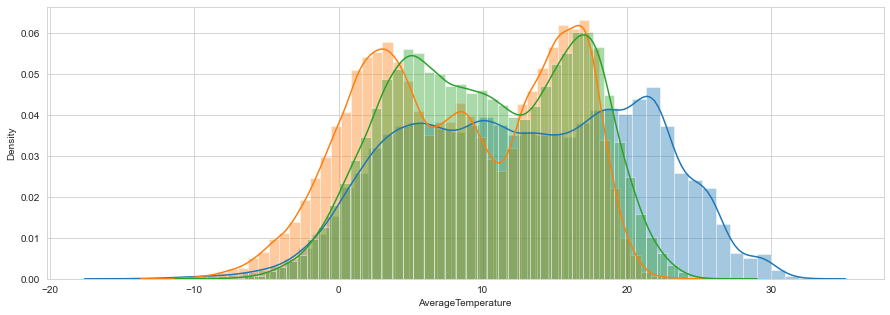

C:\Users\Python\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Python\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Python\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use e

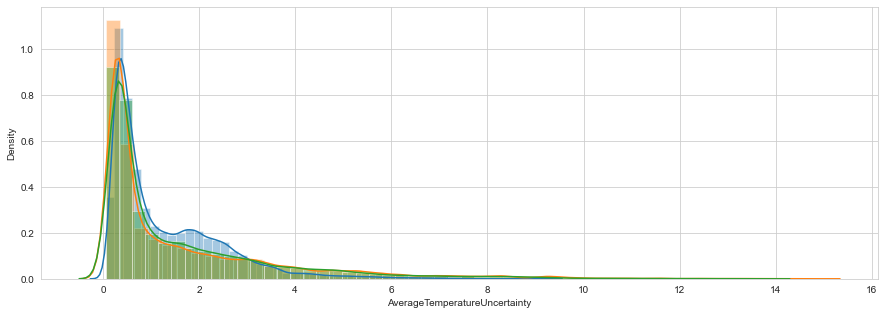

In [40]:
kolonlar = selected_data.columns[1:3]
ulkeler = selected_data["Country"].unique()
for kolon in kolonlar:
    plt.figure(figsize=(15,5))
    for ulke in ulkeler:
        sns.distplot(selected_data[selected_data["Country"]==ulke][kolon])
    plt.show()

In [41]:
tr_data = selected_data[(selected_data["Country"]=="Turkey") & (selected_data["dt"] > "01.01.1990")]
tr_data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
6194,1990-02-01,6.354,0.441,Çorlu,Turkey,40.99N,27.69E
6195,1990-03-01,9.255,0.259,Çorlu,Turkey,40.99N,27.69E
6196,1990-04-01,12.533,0.275,Çorlu,Turkey,40.99N,27.69E
6197,1990-05-01,15.497,0.347,Çorlu,Turkey,40.99N,27.69E
6198,1990-06-01,20.209,0.384,Çorlu,Turkey,40.99N,27.69E


<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

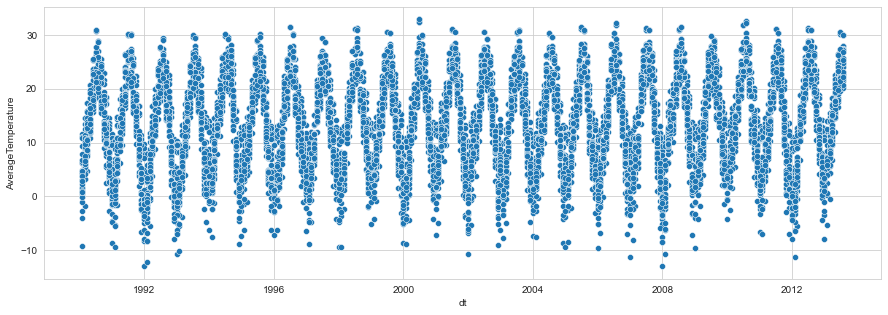

In [44]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="dt", y="AverageTemperature", data=tr_data)

<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

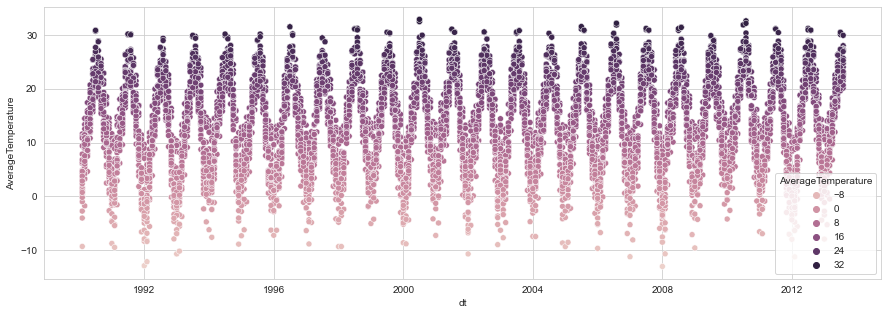

In [45]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="dt", y="AverageTemperature", data=tr_data, hue="AverageTemperature")

<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

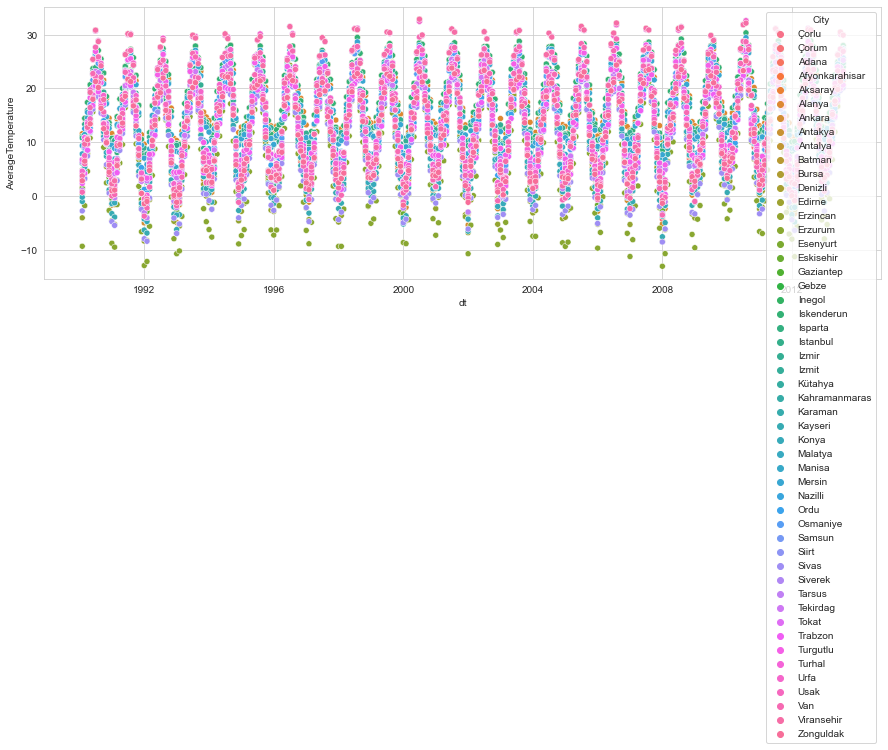

In [46]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="dt", y="AverageTemperature", data=tr_data, hue="City")

In [53]:
tr_data_means = tr_data.groupby(tr_data["dt"].dt.to_period("Y")).mean() #verimizi yıllara göre grupladık. Yıllara göre sıcaklık ortalamasını aldık.
tr_data_means = tr_data_means.reset_index() #groupby ile yaptığımız sorguda yıllar index olmuştu. Burada index düzenlemesi yaptık.
tr_data_means.info() #verilerin bilgilerine bakıyoruz ve burada "dt" alanımızın dtype bilgisi period olarak değişmiş. Bunu düzeltmemiz gerekiyor.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype        
---  ------                         --------------  -----        
 0   dt                             24 non-null     period[A-DEC]
 1   AverageTemperature             24 non-null     float64      
 2   AverageTemperatureUncertainty  24 non-null     float64      
dtypes: float64(2), period[A-DEC](1)
memory usage: 704.0 bytes


In [62]:
tr_data_means["dt"] = tr_data_means["dt"].astype("string").astype("datetime64") #period direkt olarak datetime'a çevrilemediği için önce string, daha sonra datetime yaptık.

In [63]:
tr_data_means.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             24 non-null     datetime64[ns]
 1   AverageTemperature             24 non-null     float64       
 2   AverageTemperatureUncertainty  24 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 704.0 bytes


<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

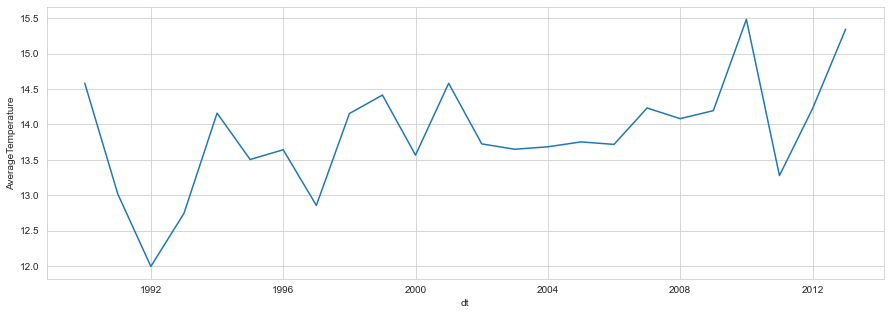

In [64]:
plt.figure(figsize=(15,5))
sns.lineplot(x="dt", y="AverageTemperature", data=tr_data_means)

In [68]:
data_1990 = selected_data[selected_data["dt"] > "01.01.1990"]

In [75]:
temp_mean = data_1990.groupby(["Country", data_1990["dt"].dt.to_period("Y")]).mean()
data_means = temp_mean.reset_index()
data_means["dt"] = data_means["dt"].astype("string").astype("datetime64")
data_means.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Country                        72 non-null     object        
 1   dt                             72 non-null     datetime64[ns]
 2   AverageTemperature             72 non-null     float64       
 3   AverageTemperatureUncertainty  72 non-null     float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 2.4+ KB


In [76]:
data_means

,Country,dt,AverageTemperature,AverageTemperatureUncertainty
0,France,1990-01-01,12.387076,0.276884
1,France,1991-01-01,10.662877,0.244826
2,France,1992-01-01,11.102995,0.300139
3,France,1993-01-01,10.708160,0.257634
4,France,1994-01-01,11.939590,0.251252
...,...,...,...,...
67,Turkey,2009-01-01,14.194766,0.369637
68,Turkey,2010-01-01,15.483237,0.438613
69,Turkey,2011-01-01,13.278969,0.414487
70,Turkey,2012-01-01,14.221969,0.496595


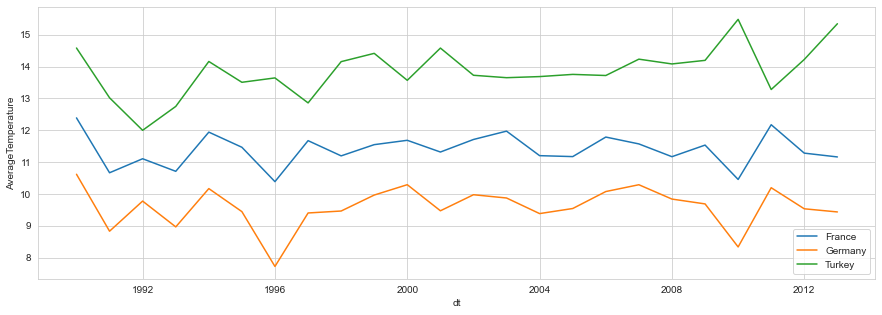

In [77]:
plt.figure(figsize=(15,5))
for ulke in data_means["Country"].unique():
    data = data_means[data_means["Country"] == ulke]
    sns.lineplot(x="dt", y="AverageTemperature", data=data)

plt.legend(data_means["Country"].unique())

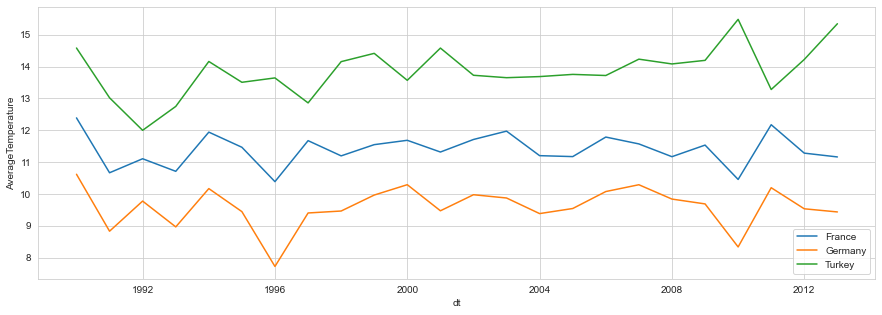

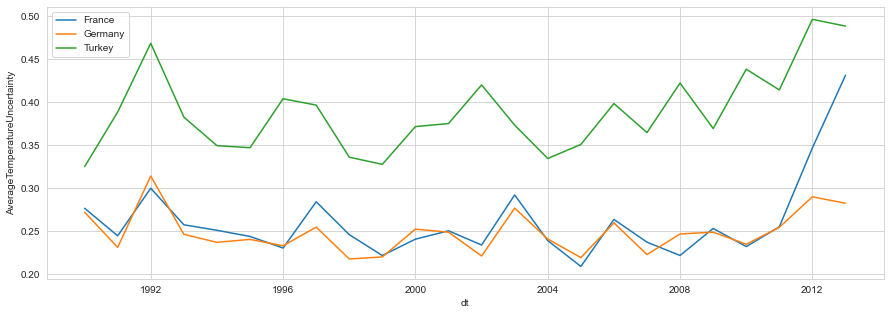

In [78]:
for col in data_means.columns[2:4]:  
    plt.figure(figsize=(15,5))
    for ulke in data_means["Country"].unique():
        data = data_means[data_means["Country"] == ulke]
        sns.lineplot(x="dt", y=col, data=data)

        plt.legend(data_means["Country"].unique())
        
    plt.show()